# Time Series Analysis

In [1]:
# staionary --> constant mean, constant variance, auto covariance

In [2]:
# Trend, Seasonality, Irregularity, Cycle

In [3]:
# moving average

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [6]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [13]:
figure = px.line(df,x="date",y="meantemp",title="New Delhi Avg.Temp.")

In [16]:
figure

In [24]:
figure = px.line(df,x="date",y="humidity",title="New Delhi Avg.Humidity")
figure

In [25]:
figure = px.line(df,x="date",y="wind_speed",title="New Delhi Avg.Wind Speed")
figure

In [26]:
px.scatter(df,x= "humidity",y="meantemp",size = 'meantemp',trendline ='ols')

In [27]:
df["date"] = pd.to_datetime(df["date"],format="%Y-%m-%d")

In [28]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [29]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


<Axes: xlabel='month', ylabel='meantemp'>

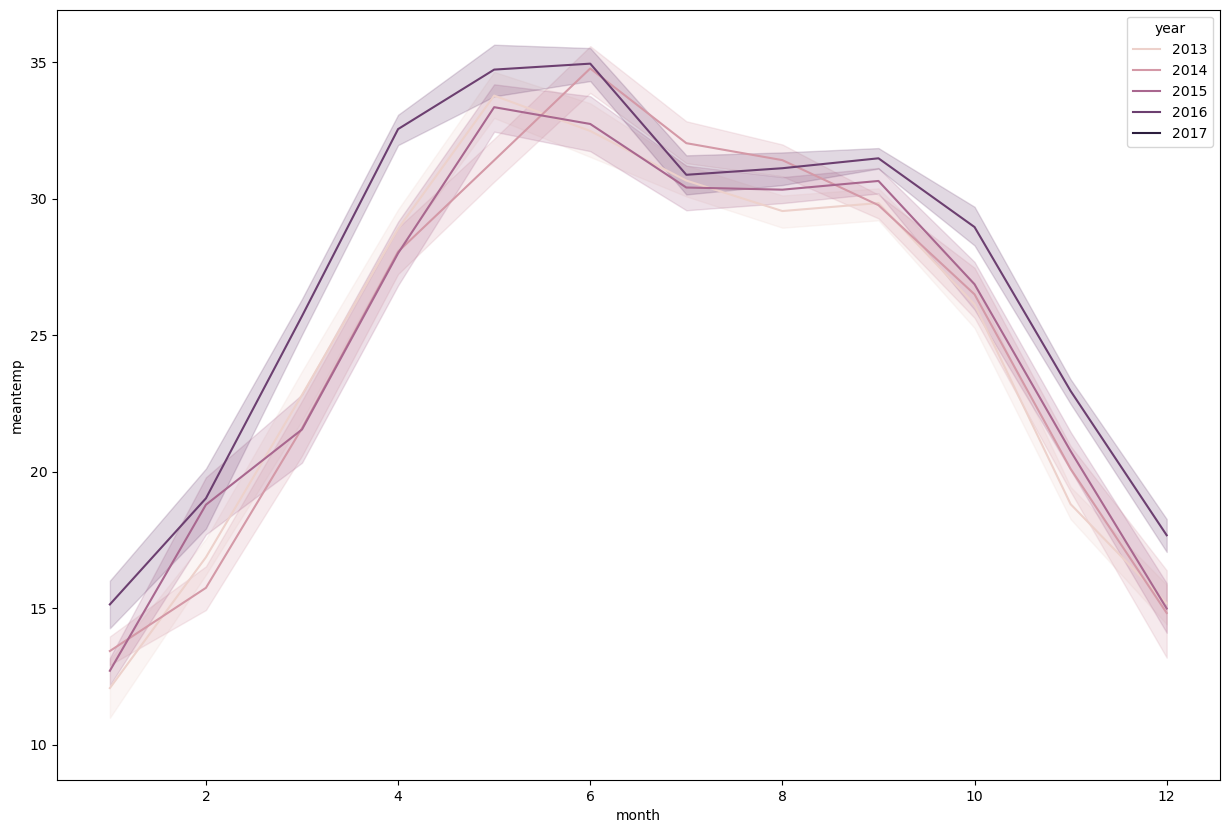

In [32]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x= "month", y = "meantemp", hue="year")

In [33]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [35]:
#pip install prophet

In [42]:
forecast_data = df.rename(columns = {"date": "ds","meantemp":"y"})

In [44]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forecasts)
plot_plotly(model,predictions)

14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1] done processing
